## Best areas (zipcode) in New York City for Rental Properties Investment
#### -—— by AirBnB & Zillow data challenge

### Task description:
We have already known that two bedroom properties are the most profitable on short-term rentals in New York City. To further investigate which areas (zip codes) are the best to invest in, we use AirBnB and Zillow data as the references for Revenue and Cost, respectively. Below are some introductions about AirBnB and Zillow.

- **AirBnB：**
AirBnB operates an online marketplace and hospitality service. It allows people to lease or rent short-term lodging. Pricing is determined by the host, with recommendations from Airbnb. Hosts can charge different prices for nightly, weekly, and monthly stays and can make adjustments for seasonal pricing. It is the indicator of short-term revenue here in the project. <br>
(Wikipedia: https://en.wikipedia.org/wiki/Airbnb)

- **Zillow:**
Zillow determines an estimate ("Zestimate") for a home based on a range of publicly available information, including public data and sales of comparable houses in a neighborhood. It is the indicator of the cost here in the project. <br>
(Wikipedia: https://en.wikipedia.org/wiki/Zillow)

### Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
if not os.path.exists("figs"): os.makedirs("figs")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

### Zillow data

In [2]:
# loading zillow data
url = "https://github.com/CapitalOneRecruiting/DA/blob/master/Zip_Zhvi_2bedroom.csv?raw=True"
zillow_data = pd.read_csv(url)
zillow_data

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61627,10013,New York,NY,New York,New York,1744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1428000.0,1444100.0,1458700.0,1502700.0,1570100.0,1638000.0,1687000.0,1718300.0,1747600.0,1753300.0,1706600.0,1660500.0,1650500.0,1642200.0,1625600.0,1618600.0,1618900.0,1622200.0,1623500.0,1639500.0,1678900.0,1705500.0,1702200.0,1701700.0,1730800.0,1773400.0,1839600.0,1903600.0,1935000.0,1946100.0,1974100.0,1987800.0,1993400.0,1990200.0,1970600.0,1953100.0,1979000.0,2032800.0,2070000.0,2090200.0,2121100.0,2167300.0,2200000.0,2226600.0,2259300.0,2285700.0,2289000.0,2288500.0,2285800.0,2281300.0,2278800.0,2295100.0,2324500.0,2328500.0,2333000.0,2366700.0,2376200.0,2377400.0,2405100.0,2433000.0,2406100.0,2350800.0,2289500.0,2257800.0,2243500.0,2241000.0,2233600.0,2219900.0,2198000.0,2209300.0,2268700.0,2294100.0,2273600.0,2261700.0,2282800.0,2288000.0,2275700.0,2281300.0,2302800.0,2290900.0,2267800.0,2253600.0,2245300.0,2264200.0,2301000.0,2328600.0,2337000.0,2341500.0,2335200.0,2316700.0,2299900.0,2318700.0,2396400.0,2479200.0,2490300.0,2466000.0,2492400.0,2542800.0,2585500.0,2618100.0,2651700.0,2670800.0,2670000.0,2665400.0,2677400.0,2687000.0,2686200.0,2687700.0,2694200.0,2708600.0,2722800.0,2727900.0,2751300.0,2794600,2845700,2899700,2928600,2914100,2915200,2945600,2973800,2988900,3018400,3063600,3075900,3063800,3077400,3108800,3123300,3106400,3067600,3047400,3054500,3071700,3078300,3073100,3089400,3121700,3134200,3152400,3173600,3195000,3234600,3302400.0,3335800.0,3324200.0,3285100.0,3274100,3298600,3341100,3347100,3305500,3261100,3244000.0,32314

In [3]:
zillow_nyc = zillow_data[zillow_data['City'] == 'New York']
zillow_nyc

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61627,10013,New York,NY,New York,New York,1744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1428000.0,1444100.0,1458700.0,1502700.0,1570100.0,1638000.0,1687000.0,1718300.0,1747600.0,1753300.0,1706600.0,1660500.0,1650500.0,1642200.0,1625600.0,1618600.0,1618900.0,1622200.0,1623500.0,1639500.0,1678900.0,1705500.0,1702200.0,1701700.0,1730800.0,1773400.0,1839600.0,1903600.0,1935000.0,1946100.0,1974100.0,1987800.0,1993400.0,1990200.0,1970600.0,1953100.0,1979000.0,2032800.0,2070000.0,2090200.0,2121100.0,2167300.0,2200000.0,2226600.0,2259300.0,2285700.0,2289000.0,2288500.0,2285800.0,2281300.0,2278800.0,2295100.0,2324500.0,2328500.0,2333000.0,2366700.0,2376200.0,2377400.0,2405100.0,2433000.0,2406100.0,2350800.0,2289500.0,2257800.0,2243500.0,2241000.0,2233600.0,2219900.0,2198000.0,2209300.0,2268700.0,2294100.0,2273600.0,2261700.0,2282800.0,2288000.0,2275700.0,2281300.0,2302800.0,2290900.0,2267800.0,2253600.0,2245300.0,2264200.0,2301000.0,2328600.0,2337000.0,2341500.0,2335200.0,2316700.0,2299900.0,2318700.0,2396400.0,2479200.0,2490300.0,2466000.0,2492400.0,2542800.0,2585500.0,2618100.0,2651700.0,2670800.0,2670000.0,2665400.0,2677400.0,2687000.0,2686200.0,2687700.0,2694200.0,2708600.0,2722800.0,2727900.0,2751300.0,2794600,2845700,2899700,2928600,2914100,2915200,2945600,2973800,2988900,3018400,3063600,3075900,3063800,3077400,3108800,3123300,3106400,3067600,3047400,3054500,3071700,3078300,3073100,3089400,3121700,3134200,3152400,3173600,3195000,3234600,3302400.0,3335800.0,3324200.0,3285100.0,3274100,3298600,3341100,3347100,3305500,3261100,3244000.0,32314

In [4]:
zillow_nyc = zillow_nyc.dropna(axis=1) # drop columns containing null values
zillow_nyc

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61627,10013,New York,NY,New York,New York,1744,2090200.0,2121100.0,2167300.0,2200000.0,2226600.0,2259300.0,2285700.0,2289000.0,2288500.0,2285800.0,2281300.0,2278800.0,2295100.0,2324500.0,2328500.0,2333000.0,2366700.0,2376200.0,2377400.0,2405100.0,2433000.0,2406100.0,2350800.0,2289500.0,2257800.0,2243500.0,2241000.0,2233600.0,2219900.0,2198000.0,2209300.0,2268700.0,2294100.0,2273600.0,2261700.0,2282800.0,2288000.0,2275700.0,2281300.0,2302800.0,2290900.0,2267800.0,2253600.0,2245300.0,2264200.0,2301000.0,2328600.0,2337000.0,2341500.0,2335200.0,2316700.0,2299900.0,2318700.0,2396400.0,2479200.0,2490300.0,2466000.0,2492400.0,2542800.0,2585500.0,2618100.0,2651700.0,2670800.0,2670000.0,2665400.0,2677400.0,2687000.0,2686200.0,2687700.0,2694200.0,2708600.0,2722800.0,2727900.0,2751300.0,2794600,2845700,2899700,2928600,2914100,2915200,2945600,2973800,2988900,3018400,3063600,3075900,3063800,3077400,3108800,3123300,3106400,3067600,3047400,3054500,3071700,3078300,3073100,3089400,3121700,3134200,3152400,3173600,3195000,3234600,3302400.0,3335800.0,3324200.0,3285100.0,3274100,3298600,3341100,3347100,3305500,3261100,3244000.0,3231400,3183300,3160200,3193500,3262200,3316500
1,61628,10014,New York,NY,New York,New York,379,1505800.0,1499800.0,1517000.0,1559000.0,1610300.0,1659600.0,1732200.0,1788500.0,1783100.0,1753200.0,1736200.0,1729400.0,1741500.0,1774500.0,1808400.0,1827500.0,1813800.0,1785500.0,1774800.0,1759800.0,1718200.0,1677300.0,1636900.0,1588800.0,1559300.0,1551900.0,1532400.0,1507000.0,1496600.0,1502400.0,1485700.0,1451800.0,1454400.0,1494500.0,1542200.0,1587300.0,1616000.0,1612300.0,1605800.0,1592500.0,1584200.0,1587600.0,1594300.0,1611700.0,1631800.0,1648800.0,1670500.0,1674300.0,1657100.0,1659200.0,1661800.0,1641600.0,1637800.0,1646600.0,1652100.0,1674800.0,1714300.0,1736800.0,1736800.0,1741200.0,1757700.0,1772600.0,1779300.0,1795000.0,1790300.0,1761100.0,1744400.0,1755400.0,1761200.0,1767000.0,1804300.0,1889100.0,1963800.0,2003800.0,2041600,2098500,2143400,2175600,2203100,2219000,2222700,2225400,2215900,2161700,2079100,2018200,1991700,1986200,2027900,2081200,2093200,2082800,2107300,2142400,2167100,2189400,2220100,2250300,2275700,2301600,2314700,2322000,2334500,2360300,2384700.0,2388200.0,2358300.0,2345800.0,2381700,2439700,2483000,2480800,2443200,2430100,2452900.0,2451200,2441900,2460900,2494900,2498400,2491600
2,61625,10011,New York,NY,New York,New York,15,1514600.0,1541900.0,1563500.0,1591300.0,1609900.0,1630300.0,1639200.0,1626700.0,1618900.0,1635400.0,1642000.0,1648300.0,1671100.0,1681400.0,1691600.0,1706200.0,1711100.0,1714100.0,1733400.0,1737700.0,1719900.0,1678200.0,1628400.0,1578300.0,1528400.0,1489200.0,1467000.0,1449400.0,1432100.0,1422700.0,1402200.0,1378600.0,1372300.0,1393100.0,1430000.0,1462100.0,1476800.0,1479000.0,1476600.0,1461200.0,1448300.0,1441600.0,1444300.0,1438600.0,1434100.0,1439300.0,1437700.0,1430300.0,1426800.0,1427800.0,1424600.0,1432800.0,1456500.0,1485100.0,1500200.0,1509600.0,1518500.0,1530800.

In [5]:
zillow_nyc['RegionName'].isnull().sum()

0

### Airbnb data

In [6]:
%%time
chunks = 4
dtypes = {43: "str", 88: "str"}  ## reduce warning messages
data = []
for i in range(1, chunks+1):
    url = f'https://github.com/CapitalOneRecruiting/DA/blob/master/listings%20file%20{i}%20of%204.csv?raw=true' ## f formatting
    header = None if i > 1 else "infer"
    df = pd.read_csv(url, header = header, dtype = dtypes)
    if i > 1 : df.columns = data[i-2].columns
    print(i, df.shape)
    data.append(df)
airbnb_data = pd.concat(data)
print(airbnb_data.shape)

1 (9999, 95)
2 (10000, 95)
3 (10000, 95)
4 (10754, 95)
(40753, 95)
CPU times: total: 5.8 s
Wall time: 14.1 s


In [7]:
airbnb_data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,7949480,https://www.airbnb.com/rooms/7949480,2.020000e+13,5/3/17,City Island Sanctuary relaxing BR & Bath w Par...,Come relax on City Island in our quiet guest r...,"On parle fran√ßais et anglais, (lire Fran√ßais...",Come relax on City Island in our quiet guest r...,none,City Island is a unique sanctuary in New York ...,We are walkable to Pelham Park which is the la...,"On the island, you can walk to everything. A ...",Feel free to enjoy our large backyard in seaso...,We speak fluent French and English. We will b...,No extra guests or visitors who are not in the...,https://a0.muscache.com/im/pictures/001d1cb0-6...,https://a0.muscache.com/im/pictures/001d1cb0-6...,https://a0.muscache.com/im/pictures/001d1cb0-6...,https://a0.muscache.com/im/pictures/001d1cb0-6...,119445,https://www.airbnb.com/users/show/119445,Linda & Didier,5/6/10,"New York, New York, United States","I am a designer, former instructor at a design...",within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/2de30fe4-b...,https://a0.muscache.com/im/pictures/2de30fe4-b...,City Island,1.0,1.0,"['email', 'phone', 'reviews', 'jumio']",t,t,"City Island, Bronx, NY 10464, United States",City Island,City Island,Bronx,Bronx,NY,10464,New York,"Bronx, NY",US,United States,40.852054,-73.788680,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{""Cable TV"",""Wireless Internet"",""Air condition...",NaN,$99.00,NaN,NaN,$100.00,NaN,1,$20.00,1,7,yesterday,NaN,24,54,80,170,5/3/17,25,1/18/16,4/23/17,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,moderate,t,t,1,1.59
1,16042478,https://www.airbnb.com/rooms/16042478,2.020000e+13,5/4/17,WATERFRONT STUDIO APARTMENT,My place is close to Sea Shore. You‚Äôll love ...,(URL HIDDEN),My place is close to Sea Shore. You‚Äôll love ...,none,(URL HIDDEN),"Fine sea food restaurant, bars and night clubs...",NaN,"public transport from Grand Central, NYC or fr...",NaN,NaN,https://a0.muscache.com/im/pictures/bb5bc3c4-3...,https://a0.muscache.com/im/pictures/bb5bc3c4-3...,https://a0.muscache.com/im/pictures/bb5bc3c4-3...,https://a0.muscache.com/im/pictures/bb5bc3c4-3...,9117975,https://www.airbnb.com/users/show/9117975,Collins,9/29/13,"New York, New York, United States",I am married with 3 children and 2 grandkid. ...,a few days or more,0%,NaN,f,https://a0.muscache.com/im/users/9117975/profi...,https://a0.muscache.com/im/users/9117975/profi...,City Island,1.0,1.0,"['phone', 'facebook']",t,f,"City Island, Bronx, NY 10464, United States",City Island,City Island,Bronx,Bronx,NY,10464,New York,"Bronx, NY",US,United States,40.853491,-73.788607,t,Apartment,Private r

In [8]:
airbnb_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [9]:
airbnb_data['bedrooms'].value_counts()

1.0     30296
2.0      4894
0.0      3525
3.0      1458
4.0       375
5.0        87
6.0        29
7.0         8
8.0         7
10.0        3
9.0         2
Name: bedrooms, dtype: int64

In [10]:
airbnb_1br = airbnb_data[airbnb_data['bedrooms'] == 1]
airbnb_2br = airbnb_data[airbnb_data['bedrooms'] == 2]
airbnb = pd.concat([airbnb_1br, airbnb_2br])

In [52]:
airbnb_data[airbnb_data['bedrooms'].isin([1, 2])]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,7949480,https://www.airbnb.com/rooms/7949480,2.020000e+13,5/3/17,City Island Sanctuary relaxing BR & Bath w Par...,Come relax on City Island in our quiet guest r...,"On parle fran√ßais et anglais, (lire Fran√ßais...",Come relax on City Island in our quiet guest r...,none,City Island is a unique sanctuary in New York ...,We are walkable to Pelham Park which is the la...,"On the island, you can walk to everything. A ...",Feel free to enjoy our large backyard in seaso...,We speak fluent French and English. We will b...,No extra guests or visitors who are not in the...,https://a0.muscache.com/im/pictures/001d1cb0-6...,https://a0.muscache.com/im/pictures/001d1cb0-6...,https://a0.muscache.com/im/pictures/001d1cb0-6...,https://a0.muscache.com/im/pictures/001d1cb0-6...,119445,https://www.airbnb.com/users/show/119445,Linda & Didier,5/6/10,"New York, New York, United States","I am a designer, former instructor at a design...",within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/2de30fe4-b...,https://a0.muscache.com/im/pictures/2de30fe4-b...,City Island,1.0,1.0,"['email', 'phone', 'reviews', 'jumio']",t,t,"City Island, Bronx, NY 10464, United States",City Island,City Island,Bronx,Bronx,NY,10464,New York,"Bronx, NY",US,United States,40.852054,-73.788680,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{""Cable TV"",""Wireless Internet"",""Air condition...",NaN,$99.00,NaN,NaN,$100.00,NaN,1,$20.00,1,7,yesterday,NaN,24,54,80,170,5/3/17,25,1/18/16,4/23/17,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,moderate,t,t,1,1.59
1,16042478,https://www.airbnb.com/rooms/16042478,2.020000e+13,5/4/17,WATERFRONT STUDIO APARTMENT,My place is close to Sea Shore. You‚Äôll love ...,(URL HIDDEN),My place is close to Sea Shore. You‚Äôll love ...,none,(URL HIDDEN),"Fine sea food restaurant, bars and night clubs...",NaN,"public transport from Grand Central, NYC or fr...",NaN,NaN,https://a0.muscache.com/im/pictures/bb5bc3c4-3...,https://a0.muscache.com/im/pictures/bb5bc3c4-3...,https://a0.muscache.com/im/pictures/bb5bc3c4-3...,https://a0.muscache.com/im/pictures/bb5bc3c4-3...,9117975,https://www.airbnb.com/users/show/9117975,Collins,9/29/13,"New York, New York, United States",I am married with 3 children and 2 grandkid. ...,a few days or more,0%,NaN,f,https://a0.muscache.com/im/users/9117975/profi...,https://a0.muscache.com/im/users/9117975/profi...,City Island,1.0,1.0,"['phone', 'facebook']",t,f,"City Island, Bronx, NY 10464, United States",City Island,City Island,Bronx,Bronx,NY,10464,New York,"Bronx, NY",US,United States,40.853491,-73.788607,t,Apartment,Private r

In [11]:
airbnb

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,7949480,https://www.airbnb.com/rooms/7949480,2.020000e+13,5/3/17,City Island Sanctuary relaxing BR & Bath w Par...,Come relax on City Island in our quiet guest r...,"On parle fran√ßais et anglais, (lire Fran√ßais...",Come relax on City Island in our quiet guest r...,none,City Island is a unique sanctuary in New York ...,We are walkable to Pelham Park which is the la...,"On the island, you can walk to everything. A ...",Feel free to enjoy our large backyard in seaso...,We speak fluent French and English. We will b...,No extra guests or visitors who are not in the...,https://a0.muscache.com/im/pictures/001d1cb0-6...,https://a0.muscache.com/im/pictures/001d1cb0-6...,https://a0.muscache.com/im/pictures/001d1cb0-6...,https://a0.muscache.com/im/pictures/001d1cb0-6...,119445,https://www.airbnb.com/users/show/119445,Linda & Didier,5/6/10,"New York, New York, United States","I am a designer, former instructor at a design...",within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/2de30fe4-b...,https://a0.muscache.com/im/pictures/2de30fe4-b...,City Island,1.0,1.0,"['email', 'phone', 'reviews', 'jumio']",t,t,"City Island, Bronx, NY 10464, United States",City Island,City Island,Bronx,Bronx,NY,10464,New York,"Bronx, NY",US,United States,40.852054,-73.788680,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{""Cable TV"",""Wireless Internet"",""Air condition...",NaN,$99.00,NaN,NaN,$100.00,NaN,1,$20.00,1,7,yesterday,NaN,24,54,80,170,5/3/17,25,1/18/16,4/23/17,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,moderate,t,t,1,1.59
1,16042478,https://www.airbnb.com/rooms/16042478,2.020000e+13,5/4/17,WATERFRONT STUDIO APARTMENT,My place is close to Sea Shore. You‚Äôll love ...,(URL HIDDEN),My place is close to Sea Shore. You‚Äôll love ...,none,(URL HIDDEN),"Fine sea food restaurant, bars and night clubs...",NaN,"public transport from Grand Central, NYC or fr...",NaN,NaN,https://a0.muscache.com/im/pictures/bb5bc3c4-3...,https://a0.muscache.com/im/pictures/bb5bc3c4-3...,https://a0.muscache.com/im/pictures/bb5bc3c4-3...,https://a0.muscache.com/im/pictures/bb5bc3c4-3...,9117975,https://www.airbnb.com/users/show/9117975,Collins,9/29/13,"New York, New York, United States",I am married with 3 children and 2 grandkid. ...,a few days or more,0%,NaN,f,https://a0.muscache.com/im/users/9117975/profi...,https://a0.muscache.com/im/users/9117975/profi...,City Island,1.0,1.0,"['phone', 'facebook']",t,f,"City Island, Bronx, NY 10464, United States",City Island,City Island,Bronx,Bronx,NY,10464,New York,"Bronx, NY",US,United States,40.853491,-73.788607,t,Apartment,Private r

In [69]:
key_cols = ['neighbourhood_group_cleansed', 'zipcode', 'property_type', 'room_type', 'bedrooms', 'availability_60', 'price']
airbnb_nyc = airbnb.loc[airbnb['zipcode'] != '1m', key_cols].dropna(subset = 'zipcode', axis = 0)
airbnb_nyc['zipcode'] = airbnb_nyc['zipcode'].str[0:5].astype(int) # convert zipcodes to five-digit integers
airbnb_nyc['price'] = airbnb_nyc['price'].replace('[\$,]', '', regex=True).astype(float) # format prices as float
airbnb_nyc

,neighbourhood_group_cleansed,zipcode,property_type,room_type,bedrooms,availability_60,price
0,Bronx,10464,House,Private room,1.0,54,$99.00
1,Bronx,10464,Apartment,Private room,1.0,60,$200.00
3,Bronx,10464,Apartment,Entire home/apt,1.0,30,$125.00
4,Bronx,10464,House,Private room,1.0,47,$69.00
6,Bronx,10464,House,Entire home/apt,1.0,33,$85.00
...,...,...,...,...,...,...,...
10725,Brooklyn,11211,Apartment,Entire home/apt,2.0,39,$250.00
10738,Brooklyn,11211,Apartment,Entire home/apt,2.0,0,$125.00
10751,Manhattan,10004,Boat,Entire home/apt,2.0,4,$600.00
10752,Manhattan,10029,Apartment,Private room,2.0,59,$129.00


In [70]:
airbnb_nyc.isnull().sum() # zipcode has 522 missing values

neighbourhood_group_cleansed    0
zipcode                         0
property_type                   0
room_type                       0
bedrooms                        0
availability_60                 0
price                           0
dtype: int64

### Price trends of two-bedroom properties

In [19]:
zillow_nyc.set_index('RegionName', inplace=True)

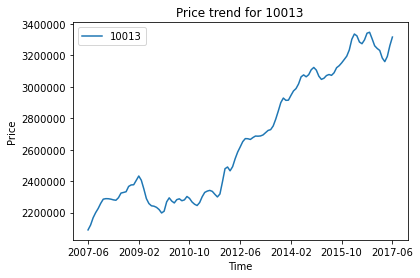

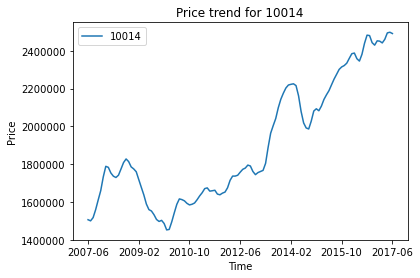

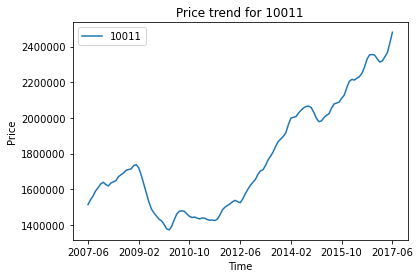

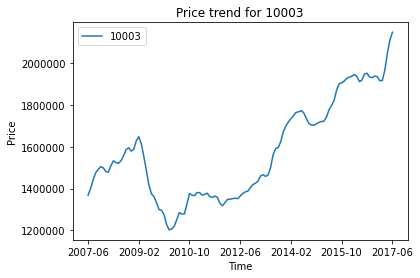

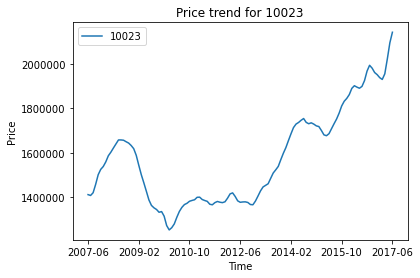

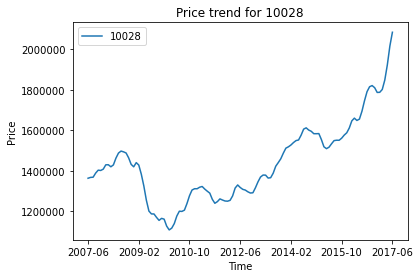

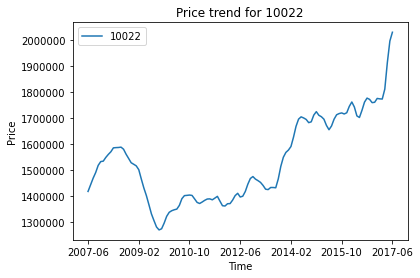

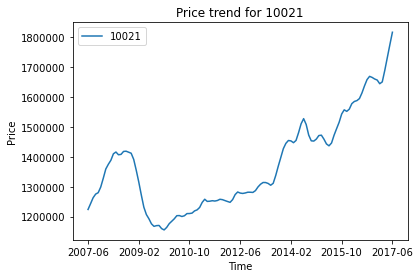

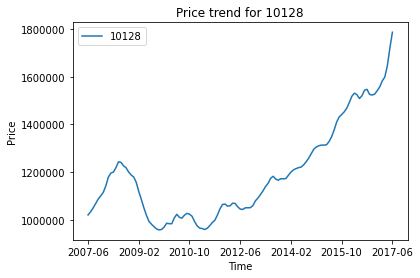

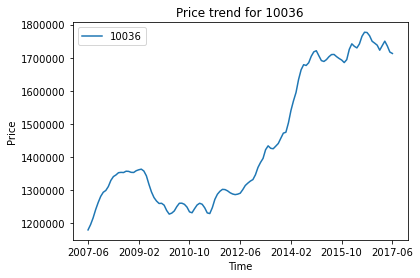

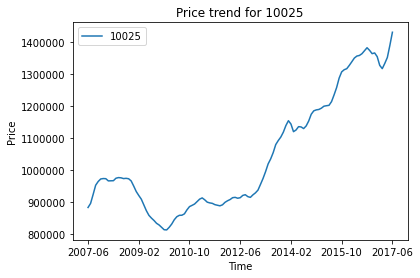

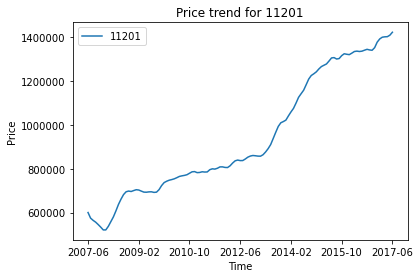

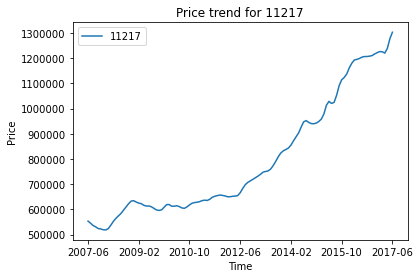

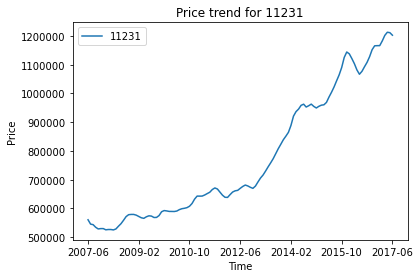

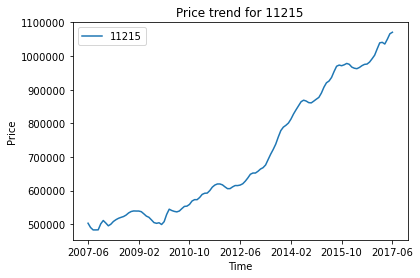

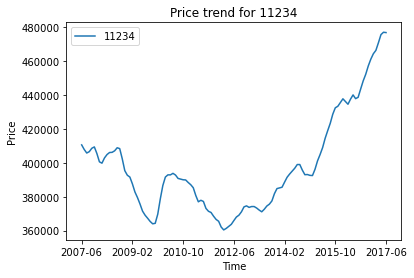

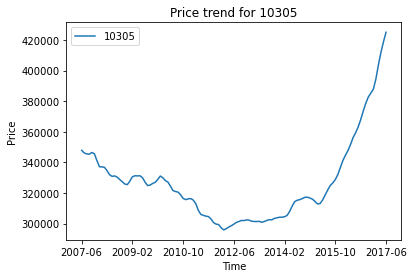

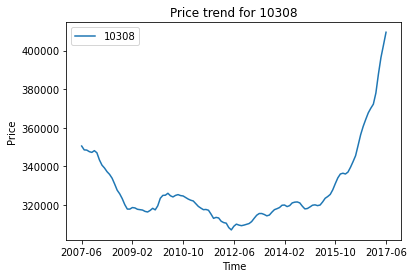

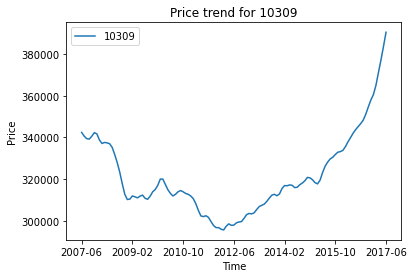

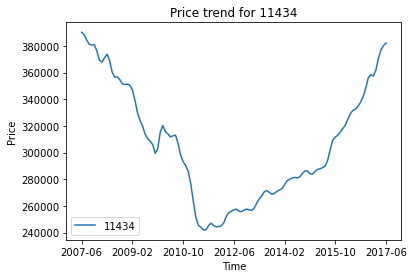

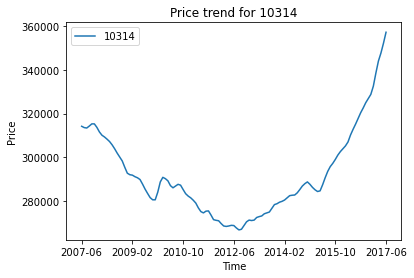

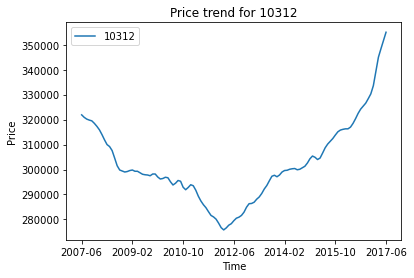

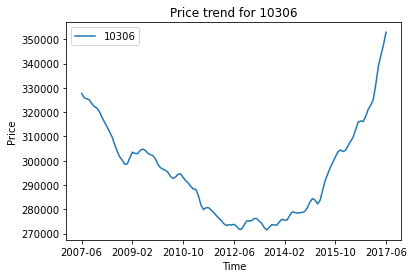

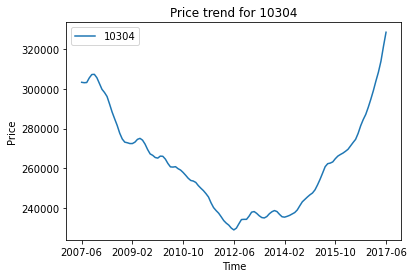

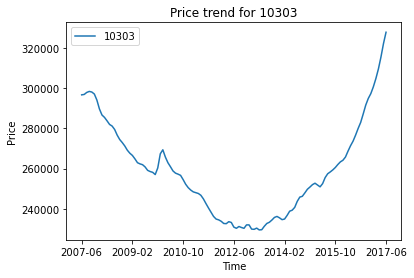

In [20]:
for zipcode in zillow_nyc.index:
    price_trends = zillow_nyc.loc[zipcode]['2007-06':'2017-06']
    plt.ticklabel_format(style='plain')
    price_trends.plot(legend=True)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title('Price trend for %d' % zipcode)
    plt.show()

### Property distribution by room types

In [21]:
airbnb_nyc['room_type'].value_counts()

Private room       19003
Entire home/apt    14489
Shared room         1175
Name: room_type, dtype: int64

<AxesSubplot:xlabel='neighbourhood_group_cleansed', ylabel='count'>

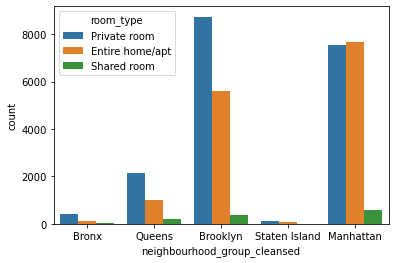

In [22]:
import seaborn as sns
sns.countplot(x = 'neighbourhood_group_cleansed', data = airbnb_nyc, hue = 'room_type')

In [23]:
room_type_comp = airbnb_nyc.groupby('room_type').price.agg([np.mean, np.median, 'count'])
room_type_comp

,mean,median,count
room_type,,,
Entire home/apt,192.880737,159.0,14489
Private room,86.887491,71.0,19003
Shared room,70.186383,50.0,1175


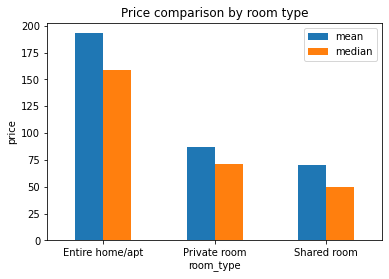

In [24]:
room_type_comp.iloc[:, :2].plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.ylabel('price')
plt.title('Price comparison by room type')
plt.savefig('figs/price comparison.png')

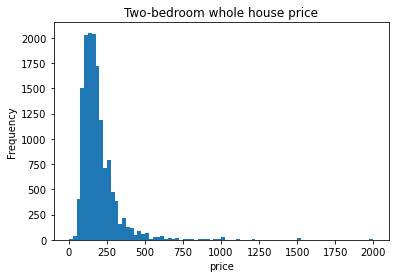

In [25]:
airbnb_nyc = airbnb_nyc[airbnb_nyc['room_type'] == 'Entire home/apt']
airbnb_nyc['price'].plot(kind='hist', bins=80, range= (0, 2000))
plt.xlabel('price')
plt.title('Two-bedroom whole house price')
plt.savefig('figs/Two-bedroom whole house price.png')

### ROI
Assume a 75% occupancy rate. ROI = annual_rental_income / house_price

In [79]:
price_by_zip_raw = airbnb_nyc.groupby(['zipcode', 'bedrooms']).price.agg([np.median, 'count'])
price_by_zip = price_by_zip_raw[price_by_zip_raw['count'] > 10].dropna()[['median']].unstack()
price_by_zip

median       
bedrooms    1.0    2.0
zipcode               
10001     139.0  350.0
10002     110.0  225.0
10003     140.0  249.5
10004     140.0    NaN
10005     129.5    NaN
...         ...    ...
11434      59.0    NaN
11435      56.0    NaN
11691      55.0    NaN
11692      55.0    NaN
11693      82.5    NaN

[145 rows x 2 columns]

In [73]:
pd.pivot_table(airbnb_nyc, index = 'zipcode', columns = 'bedrooms', values = 'price', aggfunc = 'median')

bedrooms,1.0,2.0
zipcode,,
7310,NaN,67.0
10000,200.0,NaN
10001,139.0,350.0
10002,110.0,225.0
10003,140.0,249.5
...,...,...
11691,55.0,122.5
11692,55.0,115.0
11693,82.5,125.0


mean             median         count       
bedrooms         1.0         2.0    1.0    2.0    1.0    2.0
zipcode                                                     
10001     242.423423  427.370370  200.0  362.5  111.0   54.0
10002     179.465241  341.496894  165.0  240.0  374.0  161.0
10003     211.240506  323.889764  189.0  250.0  316.0  127.0
10009     179.640118  255.294118  175.0  249.0  339.0  153.0
10010     217.039062  380.756098  199.5  300.0  128.0   41.0
...              ...         ...    ...    ...    ...    ...
11237     118.701923  139.484375  115.0  137.0  104.0   64.0
11238     134.152542  179.906077  125.0  175.0  295.0  181.0
11249     187.819209  280.803922  175.0  250.0  177.0  102.0
11375     109.526316  142.272727  100.0  149.0   19.0   11.0
11385     104.954545  122.650000   90.0  107.5   44.0   40.0

[64 rows x 6 columns]

In [28]:
zillow_nyc['bedrooms'] = 2
zillow_nyc

C:\Users\fanci\AppData\Local\Temp\ipykernel_9288\190050678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow_nyc['bedrooms'] = 2


,RegionID,City,State,Metro,CountyName,SizeRank,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,bedrooms
RegionName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10013,61627,New York,NY,New York,New York,1744,2090200.0,2121100.0,2167300.0,2200000.0,2226600.0,2259300.0,2285700.0,2289000.0,2288500.0,2285800.0,2281300.0,2278800.0,2295100.0,2324500.0,2328500.0,2333000.0,2366700.0,2376200.0,2377400.0,2405100.0,2433000.0,2406100.0,2350800.0,2289500.0,2257800.0,2243500.0,2241000.0,2233600.0,2219900.0,2198000.0,2209300.0,2268700.0,2294100.0,2273600.0,2261700.0,2282800.0,2288000.0,2275700.0,2281300.0,2302800.0,2290900.0,2267800.0,2253600.0,2245300.0,2264200.0,2301000.0,2328600.0,2337000.0,2341500.0,2335200.0,2316700.0,2299900.0,2318700.0,2396400.0,2479200.0,2490300.0,2466000.0,2492400.0,2542800.0,2585500.0,2618100.0,2651700.0,2670800.0,2670000.0,2665400.0,2677400.0,2687000.0,2686200.0,2687700.0,2694200.0,2708600.0,2722800.0,2727900.0,2751300.0,2794600,2845700,2899700,2928600,2914100,2915200,2945600,2973800,2988900,3018400,3063600,3075900,3063800,3077400,3108800,3123300,3106400,3067600,3047400,3054500,3071700,3078300,3073100,3089400,3121700,3134200,3152400,3173600,3195000,3234600,3302400.0,3335800.0,3324200.0,3285100.0,3274100,3298600,3341100,3347100,3305500,3261100,3244000.0,3231400,3183300,3160200,3193500,3262200,3316500,2
10014,61628,New York,NY,New York,New York,379,1505800.0,1499800.0,1517000.0,1559000.0,1610300.0,1659600.0,1732200.0,1788500.0,1783100.0,1753200.0,1736200.0,1729400.0,1741500.0,1774500.0,1808400.0,1827500.0,1813800.0,1785500.0,1774800.0,1759800.0,1718200.0,1677300.0,1636900.0,1588800.0,1559300.0,1551900.0,1532400.0,1507000.0,1496600.0,1502400.0,1485700.0,1451800.0,1454400.0,1494500.0,1542200.0,1587300.0,1616000.0,1612300.0,1605800.0,1592500.0,1584200.0,1587600.0,1594300.0,1611700.0,1631800.0,1648800.0,1670500.0,1674300.0,1657100.0,1659200.0,1661800.0,1641600.0,1637800.0,1646600.0,1652100.0,1674800.0,1714300.0,1736800.0,1736800.0,1741200.0,1757700.0,1772600.0,1779300.0,1795000.0,1790300.0,1761100.0,1744400.0,1755400.0,1761200.0,1767000.0,1804300.0,1889100.0,1963800.0,2003800.0,2041600,2098500,2143400,2175600,2203100,2219000,2222700,2225400,2215900,2161700,2079100,2018200,1991700,1986200,2027900,2081200,2093200,2082800,2107300,2142400,2167100,2189400,2220100,2250300,2275700,2301600,2314700,2322000,2334500,2360300,2384700.0,2388200.0,2358300.0,2345800.0,2381700,2439700,2483000,2480800,2443200,2430100,2452900.0,2451200,2441900,2460900,2494900,2498400,2491600,2
10011,61625,New York,NY,New York,New York,15,1514600.0,1541900.0,1563500.0,1591300.0,1609900.0,1630300.0,1639200.0,1626700.0,1618900.0,1635400.0,1642000.0,1648300.0,1671100.0,1681400.0,1691600.0,1706200.0,1711100.0,1714100.0,1733400.0,1737700.0,1719900.0,1678200.0,1628400.0,1578300.0,1528400.0,1489200.0,1467000.0,1449400.0,1432100.0,1422700.0,1402200.0,1378600.0,1372300.0,1393100.0,1430000.0,1462100.0,1476800.0,1479000.0,1476600.0,1461200.0,1448300.0,1441600.0,1444300.0,1438600.0,143

In [29]:
zillow_nyc_copy = zillow_nyc.copy()

In [30]:
zillow_nyc_copy['bedrooms'] = 1

In [31]:
zillow_nyc_copy.loc[:, '2007-06':'2017-06'] = zillow_nyc_copy.loc[:, '2007-06':'2017-06'] / 2
zillow_nyc_copy

,RegionID,City,State,Metro,CountyName,SizeRank,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,bedrooms
RegionName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10013,61627,New York,NY,New York,New York,1744,1045100.0,1060550.0,1083650.0,1100000.0,1113300.0,1129650.0,1142850.0,1144500.0,1144250.0,1142900.0,1140650.0,1139400.0,1147550.0,1162250.0,1164250.0,1166500.0,1183350.0,1188100.0,1188700.0,1202550.0,1216500.0,1203050.0,1175400.0,1144750.0,1128900.0,1121750.0,1120500.0,1116800.0,1109950.0,1099000.0,1104650.0,1134350.0,1147050.0,1136800.0,1130850.0,1141400.0,1144000.0,1137850.0,1140650.0,1151400.0,1145450.0,1133900.0,1126800.0,1122650.0,1132100.0,1150500.0,1164300.0,1168500.0,1170750.0,1167600.0,1158350.0,1149950.0,1159350.0,1198200.0,1239600.0,1245150.0,1233000.0,1246200.0,1271400.0,1292750.0,1309050.0,1325850.0,1335400.0,1335000.0,1332700.0,1338700.0,1343500.0,1343100.0,1343850.0,1347100.0,1354300.0,1361400.0,1363950.0,1375650.0,1397300.0,1422850.0,1449850.0,1464300.0,1457050.0,1457600.0,1472800.0,1486900.0,1494450.0,1509200.0,1531800.0,1537950.0,1531900.0,1538700.0,1554400.0,1561650.0,1553200.0,1533800.0,1523700.0,1527250.0,1535850.0,1539150.0,1536550.0,1544700.0,1560850.0,1567100.0,1576200.0,1586800.0,1597500.0,1617300.0,1651200.0,1667900.0,1662100.0,1642550.0,1637050.0,1649300.0,1670550.0,1673550.0,1652750.0,1630550.0,1622000.0,1615700.0,1591650.0,1580100.0,1596750.0,1631100.0,1658250.0,1
10014,61628,New York,NY,New York,New York,379,752900.0,749900.0,758500.0,779500.0,805150.0,829800.0,866100.0,894250.0,891550.0,876600.0,868100.0,864700.0,870750.0,887250.0,904200.0,913750.0,906900.0,892750.0,887400.0,879900.0,859100.0,838650.0,818450.0,794400.0,779650.0,775950.0,766200.0,753500.0,748300.0,751200.0,742850.0,725900.0,727200.0,747250.0,771100.0,793650.0,808000.0,806150.0,802900.0,796250.0,792100.0,793800.0,797150.0,805850.0,815900.0,824400.0,835250.0,837150.0,828550.0,829600.0,830900.0,820800.0,818900.0,823300.0,826050.0,837400.0,857150.0,868400.0,868400.0,870600.0,878850.0,886300.0,889650.0,897500.0,895150.0,880550.0,872200.0,877700.0,880600.0,883500.0,902150.0,944550.0,981900.0,1001900.0,1020800.0,1049250.0,1071700.0,1087800.0,1101550.0,1109500.0,1111350.0,1112700.0,1107950.0,1080850.0,1039550.0,1009100.0,995850.0,993100.0,1013950.0,1040600.0,1046600.0,1041400.0,1053650.0,1071200.0,1083550.0,1094700.0,1110050.0,1125150.0,1137850.0,1150800.0,1157350.0,1161000.0,1167250.0,1180150.0,1192350.0,1194100.0,1179150.0,1172900.0,1190850.0,1219850.0,1241500.0,1240400.0,1221600.0,1215050.0,1226450.0,1225600.0,1220950.0,1230450.0,1247450.0,1249200.0,1245800.0,1
10011,61625,New York,NY,New York,New York,15,757300.0,770950.0,781750.0,795650.0,804950.0,815150.0,819600.0,813350.0,809450.0,817700.0,821000.0,824150.0,835550.0,840700.0,845800.0,853100.0,855550.0,857050.0,866700.0,868850.0,859950.0,839100.0,814200.0,789150.0,764200.0,744600.0,733500.0,724700.0,716050.0,711350.0,701100.0,689300.0,686150.0,696550.0,715000.0,731050.0,738400.0,739500.0,738300.0

In [32]:
zillow = pd.concat([zillow_nyc, zillow_nyc_copy])
zillow

,RegionID,City,State,Metro,CountyName,SizeRank,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,bedrooms
RegionName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10013,61627,New York,NY,New York,New York,1744,2090200.0,2121100.0,2167300.0,2200000.0,2226600.0,2259300.0,2285700.0,2289000.0,2288500.0,2285800.0,2281300.0,2278800.0,2295100.0,2324500.0,2328500.0,2333000.0,2366700.0,2376200.0,2377400.0,2405100.0,2433000.0,2406100.0,2350800.0,2289500.0,2257800.0,2243500.0,2241000.0,2233600.0,2219900.0,2198000.0,2209300.0,2268700.0,2294100.0,2273600.0,2261700.0,2282800.0,2288000.0,2275700.0,2281300.0,2302800.0,2290900.0,2267800.0,2253600.0,2245300.0,2264200.0,2301000.0,2328600.0,2337000.0,2341500.0,2335200.0,2316700.0,2299900.0,2318700.0,2396400.0,2479200.0,2490300.0,2466000.0,2492400.0,2542800.0,2585500.0,2618100.0,2651700.0,2670800.0,2670000.0,2665400.0,2677400.0,2687000.0,2686200.0,2687700.0,2694200.0,2708600.0,2722800.0,2727900.0,2751300.0,2794600.0,2845700.0,2899700.0,2928600.0,2914100.0,2915200.0,2945600.0,2973800.0,2988900.0,3018400.0,3063600.0,3075900.0,3063800.0,3077400.0,3108800.0,3123300.0,3106400.0,3067600.0,3047400.0,3054500.0,3071700.0,3078300.0,3073100.0,3089400.0,3121700.0,3134200.0,3152400.0,3173600.0,3195000.0,3234600.0,3302400.0,3335800.0,3324200.0,3285100.0,3274100.0,3298600.0,3341100.0,3347100.0,3305500.0,3261100.0,3244000.0,3231400.0,3183300.0,3160200.0,3193500.0,3262200.0,3316500.0,2
10014,61628,New York,NY,New York,New York,379,1505800.0,1499800.0,1517000.0,1559000.0,1610300.0,1659600.0,1732200.0,1788500.0,1783100.0,1753200.0,1736200.0,1729400.0,1741500.0,1774500.0,1808400.0,1827500.0,1813800.0,1785500.0,1774800.0,1759800.0,1718200.0,1677300.0,1636900.0,1588800.0,1559300.0,1551900.0,1532400.0,1507000.0,1496600.0,1502400.0,1485700.0,1451800.0,1454400.0,1494500.0,1542200.0,1587300.0,1616000.0,1612300.0,1605800.0,1592500.0,1584200.0,1587600.0,1594300.0,1611700.0,1631800.0,1648800.0,1670500.0,1674300.0,1657100.0,1659200.0,1661800.0,1641600.0,1637800.0,1646600.0,1652100.0,1674800.0,1714300.0,1736800.0,1736800.0,1741200.0,1757700.0,1772600.0,1779300.0,1795000.0,1790300.0,1761100.0,1744400.0,1755400.0,1761200.0,1767000.0,1804300.0,1889100.0,1963800.0,2003800.0,2041600.0,2098500.0,2143400.0,2175600.0,2203100.0,2219000.0,2222700.0,2225400.0,2215900.0,2161700.0,2079100.0,2018200.0,1991700.0,1986200.0,2027900.0,2081200.0,2093200.0,2082800.0,2107300.0,2142400.0,2167100.0,2189400.0,2220100.0,2250300.0,2275700.0,2301600.0,2314700.0,2322000.0,2334500.0,2360300.0,2384700.0,2388200.0,2358300.0,2345800.0,2381700.0,2439700.0,2483000.0,2480800.0,2443200.0,2430100.0,2452900.0,2451200.0,2441900.0,2460900.0,2494900.0,2498400.0,2491600.0,2
10011,61625,New York,NY,New York,New York,15,1514600.0,1541900.0,1563500.0,1591300.0,1609900.0,1630300.0,1639200.0,1626700.0,1618900.0,1635400.0,1642000.0,1648300.0,1671100.0,1681400.0,1691600.0,1706200.0,1711100.0,1714100.0,1733400.0,1737700.0,1719900.0,1678200.0,1628400.0,1578300.0,1528400.0,1489200.0,1467000.0,14494

In [33]:
zillow = pd.pivot_table(index = zillow.index, columns = 'bedrooms', values = '2017-06', data = zillow)
zillow

bedrooms,1,2
RegionName,,
10003,1073500.0,2147000.0
10011,1240200.0,2480400.0
10013,1658250.0,3316500.0
10014,1245800.0,2491600.0
10021,907800.0,1815600.0
10022,1015800.0,2031600.0
10023,1071150.0,2142300.0
10025,715500.0,1431000.0
10028,1041950.0,2083900.0


In [34]:
ROI = price_by_zip.merge(zillow, left_on = 'zipcode', right_on = zillow.index).dropna()

C:\Users\fanci\AppData\Local\Temp\ipykernel_9288\3003843764.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  ROI = price_by_zip.merge(zillow, left_on = 'zipcode', right_on = zillow.index).dropna()


In [35]:
ROI.set_index('zipcode', inplace=True)
ROI

,"(mean, 1.0)","(mean, 2.0)","(median, 1.0)","(median, 2.0)","(count, 1.0)","(count, 2.0)",1,2
zipcode,,,,,,,,
10003,211.240506,323.889764,189.0,250.0,316.0,127.0,1073500.0,2147000.0
10011,226.267218,369.590000,200.0,316.5,363.0,100.0,1240200.0,2480400.0
10013,231.181102,360.886076,200.0,300.0,127.0,79.0,1658250.0,3316500.0
10014,227.560000,331.213483,200.0,299.0,350.0,89.0,1245800.0,2491600.0
10021,196.157895,296.058824,169.0,225.0,95.0,17.0,907800.0,1815600.0
10022,213.202128,375.228571,175.0,300.0,94.0,35.0,1015800.0,2031600.0
10023,220.036269,296.620690,199.0,285.0,193.0,58.0,1071150.0,2142300.0
10025,169.898058,293.203704,150.0,244.0,206.0,108.0,715500.0,1431000.0
10028,160.336207,275.322581,150.0,249.0,116.0,31.0,1041950.0,2083900.0


In [81]:
ROI.columns[0]

('mean', 1.0)

In [36]:
ROI['1br_annual_rental_income'] = ROI.iloc[:, 2] * 365 * 0.75
ROI['2br_annual_rental_income'] = ROI.iloc[:, 3] * 365 * 0.75
ROI['1br_roi'] = ROI['1br_annual_rental_income'] / ROI.iloc[:, 6]
ROI['2br_roi'] = ROI['2br_annual_rental_income'] / ROI.iloc[:, 7]
ROI

,"(mean, 1.0)","(mean, 2.0)","(median, 1.0)","(median, 2.0)","(count, 1.0)","(count, 2.0)",1,2,1br_annual_rental_income,2br_annual_rental_income,1br_roi,2br_roi
zipcode,,,,,,,,,,,,
10003,211.240506,323.889764,189.0,250.0,316.0,127.0,1073500.0,2147000.0,51738.750,68437.500,0.048196,0.031876
10011,226.267218,369.590000,200.0,316.5,363.0,100.0,1240200.0,2480400.0,54750.000,86641.875,0.044146,0.034931
10013,231.181102,360.886076,200.0,300.0,127.0,79.0,1658250.0,3316500.0,54750.000,82125.000,0.033017,0.024763
10014,227.560000,331.213483,200.0,299.0,350.0,89.0,1245800.0,2491600.0,54750.000,81851.250,0.043948,0.032851
10021,196.157895,296.058824,169.0,225.0,95.0,17.0,907800.0,1815600.0,46263.750,61593.750,0.050962,0.033925
10022,213.202128,375.228571,175.0,300.0,94.0,35.0,1015800.0,2031600.0,47906.250,82125.000,0.047161,0.040424
10023,220.036269,296.620690,199.0,285.0,193.0,58.0,1071150.0,2142300.0,54476.250,78018.750,0.050858,0.036418
10025,169.898058,293.203704,150.0,244.0,206.0,108.0,715500.0,1431000.0,41062.500,66795.000,0.057390,0.046677
10028,160.336207,275.322581,150.0,249.0,116.0,31.0,1041950.0,2083900.0,41062.500,68163.750,0.039409,0.032710


In [37]:
ROI.sort_values('1br_roi', ascending=False).index[:10] # top 10 zipcodes for 1 bedroom properties

Int64Index([11215, 10036, 11231, 11217, 11201, 10025, 10021, 10023, 10003,
            10022],
           dtype='int64', name='zipcode')

In [38]:
ROI.sort_values('2br_roi', ascending=False).index[:10] # top 10 zipcodes for 2 bedroom properties

Int64Index([10036, 10025, 11231, 11215, 11217, 10022, 10023, 11201, 10011,
            10128],
           dtype='int64', name='zipcode')

# Q6. challenge
Different zipcodes may have different occupancy rates. Develop a strategy to calculate the occupancy rate. repeat Q3. find the zip code that is most profitable.

In [39]:
temp = airbnb_nyc.groupby("zipcode")['availability_60'].mean()
occupancy_rate = (60 - temp) / 60
occupancy_rate = pd.DataFrame([occupancy_rate]).transpose().rename(columns = {'availability_60': 'occupancy_rate'})
occupancy_rate

,occupancy_rate
zipcode,
10001,0.723434
10002,0.753178
10003,0.780248
10004,0.682609
10005,0.813063
...,...
11691,0.353333
11692,0.553571
11693,0.520513


In [40]:
ROI = pd.merge(ROI, occupancy_rate, on = 'zipcode').dropna()
ROI

,"(mean, 1.0)","(mean, 2.0)","(median, 1.0)","(median, 2.0)","(count, 1.0)","(count, 2.0)",1,2,1br_annual_rental_income,2br_annual_rental_income,1br_roi,2br_roi,occupancy_rate
zipcode,,,,,,,,,,,,,
10003,211.240506,323.889764,189.0,250.0,316.0,127.0,1073500.0,2147000.0,51738.750,68437.500,0.048196,0.031876,0.780248
10011,226.267218,369.590000,200.0,316.5,363.0,100.0,1240200.0,2480400.0,54750.000,86641.875,0.044146,0.034931,0.777214
10013,231.181102,360.886076,200.0,300.0,127.0,79.0,1658250.0,3316500.0,54750.000,82125.000,0.033017,0.024763,0.707120
10014,227.560000,331.213483,200.0,299.0,350.0,89.0,1245800.0,2491600.0,54750.000,81851.250,0.043948,0.032851,0.775550
10021,196.157895,296.058824,169.0,225.0,95.0,17.0,907800.0,1815600.0,46263.750,61593.750,0.050962,0.033925,0.847173
10022,213.202128,375.228571,175.0,300.0,94.0,35.0,1015800.0,2031600.0,47906.250,82125.000,0.047161,0.040424,0.772739
10023,220.036269,296.620690,199.0,285.0,193.0,58.0,1071150.0,2142300.0,54476.250,78018.750,0.050858,0.036418,0.826892
10025,169.898058,293.203704,150.0,244.0,206.0,108.0,715500.0,1431000.0,41062.500,66795.000,0.057390,0.046677,0.828291
10028,160.336207,275.322581,150.0,249.0,116.0,31.0,1041950.0,2083900.0,41062.500,68163.750,0.039409,0.032710,0.851020


In [41]:
ROI['1br_annual_rental_income'] = ROI.iloc[:, 2] * 365 * ROI['occupancy_rate']
ROI['2br_annual_rental_income'] = ROI.iloc[:, 3] * 365 * ROI['occupancy_rate']
ROI['1br_roi'] = ROI['1br_annual_rental_income'] / ROI.iloc[:, 6]
ROI['2br_roi'] = ROI['2br_annual_rental_income'] / ROI.iloc[:, 7]
ROI

,"(mean, 1.0)","(mean, 2.0)","(median, 1.0)","(median, 2.0)","(count, 1.0)","(count, 2.0)",1,2,1br_annual_rental_income,2br_annual_rental_income,1br_roi,2br_roi,occupancy_rate
zipcode,,,,,,,,,,,,,
10003,211.240506,323.889764,189.0,250.0,316.0,127.0,1073500.0,2147000.0,53825.429458,71197.658014,0.050140,0.033161,0.780248
10011,226.267218,369.590000,200.0,316.5,363.0,100.0,1240200.0,2480400.0,56736.609071,89785.683855,0.045748,0.036198,0.777214
10013,231.181102,360.886076,200.0,300.0,127.0,79.0,1658250.0,3316500.0,51619.741100,77429.611650,0.031129,0.023347,0.707120
10014,227.560000,331.213483,200.0,299.0,350.0,89.0,1245800.0,2491600.0,56615.186029,84639.703113,0.045445,0.033970,0.775550
10021,196.157895,296.058824,169.0,225.0,95.0,17.0,907800.0,1815600.0,52257.843006,69574.051339,0.057565,0.038320,0.847173
10022,213.202128,375.228571,175.0,300.0,94.0,35.0,1015800.0,2031600.0,49358.704780,84614.922481,0.048591,0.041649,0.772739
10023,220.036269,296.620690,199.0,285.0,193.0,58.0,1071150.0,2142300.0,60061.331673,86017.485060,0.056072,0.040152,0.826892
10025,169.898058,293.203704,150.0,244.0,206.0,108.0,715500.0,1431000.0,45348.925159,73767.584926,0.063381,0.051550,0.828291
10028,160.336207,275.322581,150.0,249.0,116.0,31.0,1041950.0,2083900.0,46593.367347,77344.989796,0.044717,0.037115,0.851020


In [42]:
ROI.sort_values('1br_roi', ascending=False).index[:10] # compared to [11215, 10036, 11231, 11217, 11201, 10025, 10021, 10023, 10003, 10022]

Int64Index([11215, 11217, 11231, 11201, 10025, 10036, 10021, 10023, 10128,
            10003],
           dtype='int64', name='zipcode')

In [43]:
ROI.sort_values('2br_roi', ascending=False).index[:10] # compared to [10036, 10025, 11231, 11215, 11217, 10022, 10023, 11201, 10011, 10128]

Int64Index([10025, 10036, 11231, 11215, 11217, 10022, 10023, 11201, 10021,
            10128],
           dtype='int64', name='zipcode')

# Q7. More Challenge
Find some ways to display the map for hot areas (highest ROI) in New York city for real state developments. Consider you need to show this map to your boss who will make business decisions.

In [44]:
ROI['zipcode'] = ROI.index
ROI.reset_index(drop=True, inplace=True)

In [45]:
ROI['zipcode'] = ROI['zipcode'].astype('str')

In [46]:
import folium

In [48]:
import json
# load GeoJSON
with open('nyc.geojson', 'r') as jsonFile:
    geo_data = json.load(jsonFile)
    
tmp = geo_data
# remove ZIP codes not in geo data
geozips = []
for i in range(len(tmp['features'])):
    if tmp['features'][i]['properties']['ZIPCODE'] in list(ROI['zipcode'].unique()):
        geozips.append(tmp['features'][i])
# creating new JSON object
new_json = dict.fromkeys(['type','features'])
new_json['type'] = 'FeatureCollection'
new_json['features'] = geozips
# save updated JSON object
open("updated_nyc.json", "w").write(json.dumps(new_json, sort_keys=True, indent=4, separators=(',', ': ')))

587204

In [49]:
def create_map(col):
    """
    Generates a folium map of NYC
    :param zipcode_data: zipcode dataset
    :param col: feature to display
    :return: m
    """

    # read updated geo data
    nyc_geo = "updated_nyc.json"

    # Initialize Folium Map with NYC latitude and longitude
    m = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

    # Create choropleth map
    m.choropleth(
        geo_data=nyc_geo,
        data=ROI,
        # col: feature of interest
        columns=['zipcode', col],
        key_on='feature.properties.ZIPCODE',
        fill_color='OrRd',
        fill_opacity=0.9,
        line_opacity=0.2,
        legend_name=col
    )

    folium.LayerControl().add_to(m)

    # Save map based on feature of interest
    m.save(col + '.html')

    return m

In [51]:
create_map('2br_roi')